<center><h1>Exploring the Mixture of Agents (MoA) Technique for Text Generation: A Notebook of Experiments</h1></center>

In this notebook, we explore the Mixture of Agents (MoA) technique—a method purported to enhance text generation accuracy beyond that of a single model like GPT-4. We aim to validate its efficacy by testing it locally with smaller models, in contrast to the larger-scale models typically used in the original MoA framework. This investigation seeks to determine if MoA can be effectively leveraged with smaller computational resources, offering potential insights into its practical utility for localized applications.

### **Table of Contents**

* [Mixture of Agents : an overview](#section-one)
* [Step 1. Install Libraries and Packages](#section-two)
* [Step 2. Download Large Language Models Locally](#section-three)
* [Step 3. Testing Large Language Models Individually](#section-four)
* [Step 4. Testing Mixture of Agents Technique](#section-five)

## **Mixture of Agents : an overview** <a id="section-one"></a>

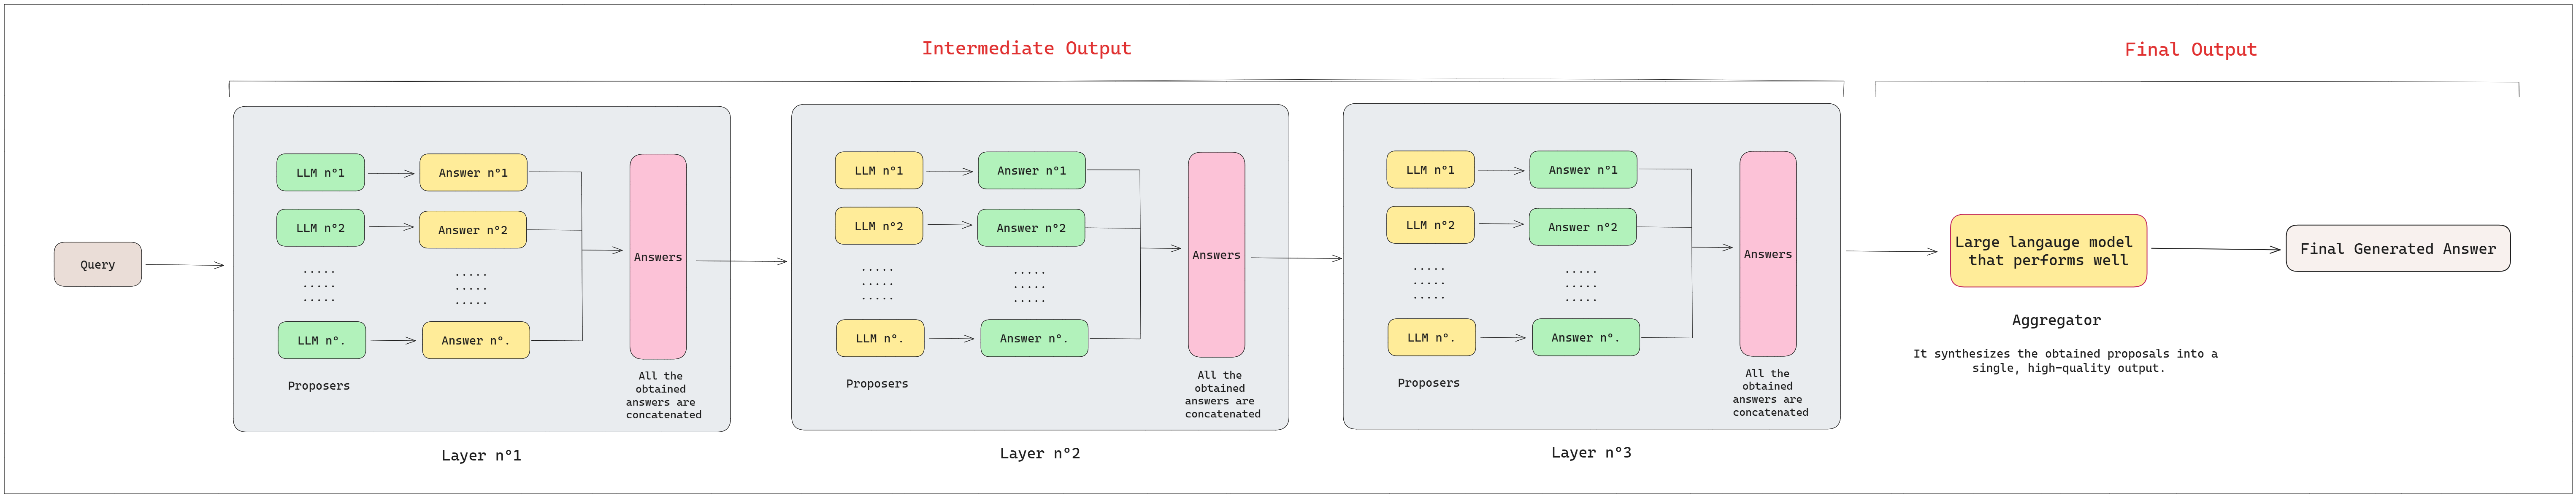

In [1]:
from IPython.display import Image
Image(filename="/kaggle/input/moa-sch/unnamed.png")

The Mixture of Agents (MoA) technique leverages a layered architecture of multiple large language model (LLM) agents working collaboratively. Each layer comprises several agents that utilize the outputs of previous layers as auxiliary information, leading to refined and enhanced responses. This technique involves two primary roles: **Proposers**, who generate diverse contexts and perspectives, and **Aggregators**, who synthesize these proposals into a cohesive, high-quality output. By iteratively refining responses through additional layers of aggregators, the MoA approach aims to harness the collaborative potential of multiple LLMs, resulting in superior text generation.

#### How Does MoA Work?
The MoA process involves the following steps:

* **Layer Organization**: Multiple LLM agents are organized into a hierarchical structure, with each layer containing one or more agents working in parallel. There is a significant collaboration between these LLMs to enhance the final output.

* **Initial Response Generation**: In the first layer, each agent independently generates responses to the given input, offering a variety of perspectives and contexts. We can choose the same models for these agents, but selecting heterogeneous models is beneficial to increase the diversity of the responses.

* **Iterative Refinement**: Responses from the first layer are provided as auxiliary information to the agents in the second layer. These agents integrate the insights from the previous layer to produce more refined responses. This iterative refinement process mitigates the deficiencies of single LLMs.

* **Collaboration and Synthesis**: This iterative process continues across multiple layers. Each successive layer builds upon the previous layer's outputs, progressively enhancing the quality and coherence of the responses.

* **Powerful Aggregators**: For the aggregators, it is crucial to choose a powerful LLM (such as LLaMA 3, for example) to effectively synthesize the diverse proposals into a high-quality final output.

* **Final Output**: The last layer synthesizes all refined responses into a single, high-quality output, effectively combining the strengths of all participating agents.

## **Step 1. Install Libraries and Packages** <a id="section-two"></a>

Llama-Index facilitates the straightforward implementation of the Mixture of Agents technique, available as an easily installable package.

In [ ]:
! pip install llama-index llama-index-llms-ollama 

In [ ]:
! pip install llama-index-packs-mixture-of-agents

## **Step 2. Download Large Language Models Locally** <a id="section-three"></a>

In [2]:
! ollama pull llama3

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest 

pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 

pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 

pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 

pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest 

pulling 6a0746a1ec1a...   0% ▕                ▏    0 B/4.7 GB                  pulling manifest

In [23]:
!ollama run phi3

^C


In [24]:
!ollama run gemma:2b

^C


In [44]:
! ollama run qwen2:1.5b

^C


Now let's check the list of the LLMs that are downloaded in our computer

In [45]:
! ollama list

NAME           	ID          	SIZE  	MODIFIED    

qwen2:1.5b     	f6daf2b25194	934 MB	2 hours ago	

gemma:2b       	b50d6c999e59	1.7 GB	3 hours ago	

phi3:latest    	d184c916657e	2.2 GB	4 hours ago	

llama3:latest  	365c0bd3c000	4.7 GB	4 hours ago	

phi_q4:latest  	24a9598927e9	2.3 GB	6 weeks ago	

phi_fp16:latest	9b649d47a8fd	7.6 GB	6 weeks ago	


## **Step 3. Testing Large Language Models Individually** <a id="section-four"></a>

In [1]:
from llama_index.llms.ollama import Ollama
import time
#llm = Ollama(model="phi_q4", request_timeout=120.0)
llm = Ollama(model="llama3:latest", request_timeout=120.0)
#llm = Ollama(model="phi3:latest", request_timeout=120.0)

In [2]:
def ask_model_simple_inference(input_q):
    start_time = time.time()
    obtained_answer = llm.complete(input_q)
    end_time = time.time()
    execution_time = end_time - start_time
    print(obtained_answer)
    print(f"Execution Time: {execution_time:.2f} seconds")

In [3]:
ask_model_simple_inference("What is blockchain technology and how does it work?")

**What is Blockchain Technology?**



Blockchain technology is a decentralized, digital ledger that records transactions across a network of computers. It's the underlying technology behind cryptocurrencies like Bitcoin, Ethereum, and others. The term "blockchain" refers to the chain of blocks, each containing information, that are linked together through cryptography.



**How Does it Work?**



Here's a simplified explanation:



1. **Network**: A network of computers (nodes) is established, each with its own copy of the blockchain.

2. **Blocks**: New transactions are grouped into "blocks," which contain a set of data, such as a list of transactions, a timestamp, and a unique code called a "hash."

3. **Hash**: Each block's hash is calculated using complex algorithms, creating an immutable link between blocks.

4. **Chain**: When a new block is added to the chain, each node on the network verifies the block's integrity by checking its hash. If the hash matches the expected value, th

In [4]:
ask_model_simple_inference("How does machine learning differ from traditional programming?")

Machine learning (ML) differs significantly from traditional programming in several ways:



1. **Data-driven approach**: In ML, you don't start by writing code to solve a problem; instead, you start with data and let the algorithm learn patterns and relationships within it.

2. **Algorithmic complexity**: Traditional programming typically involves designing algorithms that are efficient and well-structured. In ML, you often use existing algorithms (e.g., neural networks, decision trees) and focus on tuning parameters and optimizing performance.

3. **No explicit rules**: Unlike traditional programming, where you explicitly define rules and logic, ML models learn from data and generate their own rules through patterns and correlations.

4. **Training and testing**: In ML, you separate your dataset into training and testing sets. The algorithm learns from the training set and is evaluated on the testing set to measure its performance. This process helps prevent overfitting and ensures t

In [5]:
ask_model_simple_inference("Can you explain the concept of supply and demand in economics?")

Supply and demand is a fundamental concept in economics that explains how markets work. It's a two-way street that determines the prices of goods, services, and assets.



**Supply:**

The supply of a product or service refers to the amount of it that producers are willing and able to sell at a given price level. In other words, it's the quantity of the good or service that suppliers are prepared to offer for sale. The supply curve is typically upward-sloping, meaning as the price increases, the suppliers are willing to provide more of the product or service.



**Demand:**

The demand for a product or service refers to the amount of it that consumers are willing and able to buy at a given price level. In other words, it's the quantity of the good or service that buyers are prepared to purchase. The demand curve is typically downward-sloping, meaning as the price increases, the demand decreases.



**Equilibrium:**

The point where the supply and demand curves intersect is called the e

## **Step 4. Testing Mixture of Agents Technique** <a id="section-five"></a>

In [6]:
from llama_index.packs.mixture_of_agents import MixtureOfAgentsPack
# Necessary for async operations in Jupyter notebooks
import nest_asyncio

nest_asyncio.apply()

from llama_index.llms.ollama import Ollama

Now let's define a function that we are going to use through testing.

In [63]:
def generate_text_with_MoA_technique(input_question):
    start_time = time.time()
    mixture_of_agents_pack = MixtureOfAgentsPack(
        llm=Ollama(model="llama3:latest", request_timeout=120.0),  # Aggregator : we chose Llama3_8b for aggregation because it outperforms other language models
        # Proposers : we decided to use 3 llms per layer, but we faced a lot of isses when we wanted to use the other llms, so we chose Phi3 quantized to 4bit and 2 gemma_2b models
        reference_llms=[ 
            Ollama(model="phi_q4", request_timeout=120.0),
            Ollama(model="gemma:2b", request_timeout=120.0),
            Ollama(model="gemma:2b", request_timeout=120.0),
    ],
    num_layers=3, # the number of layers
    temperature=0.1)
    response = mixture_of_agents_pack.run(input_question)
    end_time = time.time()
    execution_time = end_time - start_time
    print(response)
    print(f"Execution Time: {execution_time:.2f} seconds")

the aggregation step is a crucial step in this process, the aggregator llm is fed with the concatenated outputs from the last previous layer with this prompt template:

```
You have been provided with a set of responses from various open-source models to the latest user query. Your
task is to synthesize these responses into a single, high-quality response. It is crucial to critically evaluate the
information provided in these responses, recognizing that some of it may be biased or incorrect. Your response
should not simply replicate the given answers but should offer a refined, accurate, and comprehensive reply
to the instruction. Ensure your response is well-structured, coherent, and adheres to the highest standards of
accuracy and reliability.
Responses from models:
1. [Model Response from Ai,1]
2. [Model Response from Ai,2]
...
n. [Model Response from Ai,n]
```

In [64]:
generate_text_with_MoA_technique("What is blockchain technology and how does it work?")

INFO:llama_index.packs.mixture_of_agents.base:Round 1/3 to collecting reference responses.

Round 1/3 to collecting reference responses.

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:llama_index.packs.mixture_of_agents.base:Round 2/3 to collecting reference responses.

Round 2/3 to collecting reference responses.

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:114

In [65]:
generate_text_with_MoA_technique("How does machine learning differ from traditional programming?")

INFO:llama_index.packs.mixture_of_agents.base:Round 1/3 to collecting reference responses.

Round 1/3 to collecting reference responses.

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:llama_index.packs.mixture_of_agents.base:Round 2/3 to collecting reference responses.

Round 2/3 to collecting reference responses.

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:114

In [66]:
generate_text_with_MoA_technique("Can you explain the concept of supply and demand in economics?")

INFO:llama_index.packs.mixture_of_agents.base:Round 1/3 to collecting reference responses.

Round 1/3 to collecting reference responses.

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:llama_index.packs.mixture_of_agents.base:Round 2/3 to collecting reference responses.

Round 2/3 to collecting reference responses.

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

INFO:httpx:HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"

HTTP Request: POST http://localhost:114